In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import Operator
import matplotlib.pyplot as plt

### Bramki kwantowe a klasyczne

W tym notatniku spróbujemy zrekonstruować działanie klasycznych bramek AND i OR, a także przyjrzymy się pewnej bramce, która nie ma klasycznego odpowiednika. 

### AND
Zaczniemy od bramki AND. Zwykle jej kwantowa wersja jest przedstawiana na trzech kubitach. Dwa z nich uznajemy za "wejściowe", a trzeci za "wyjście" (wynik działania AND).  

Dwa pierwsze kubity ustawiamy w superpozycji wszystkich możliwych kombinacji $\vert 0 \rangle$ i $\vert 1 \rangle$, działając na nie bramkami Hadamarda. Celem jest uzyskanie odpowiedniej kombinacji liniowej na trzecim kubicie, tj. stanu:   
$\frac{1}{2}(\vert 000 \rangle + \vert 010 \rangle + \vert 100 \rangle + \vert 111 \rangle)$.  

*Przypomnienie -* w notacji Qiskit bity najmniej znaczące są po prawej stronie (kubit 0 jest najbardziej po prawej), także spodziewamy się wyników: $000$, $010$, $001$ oraz $111$.


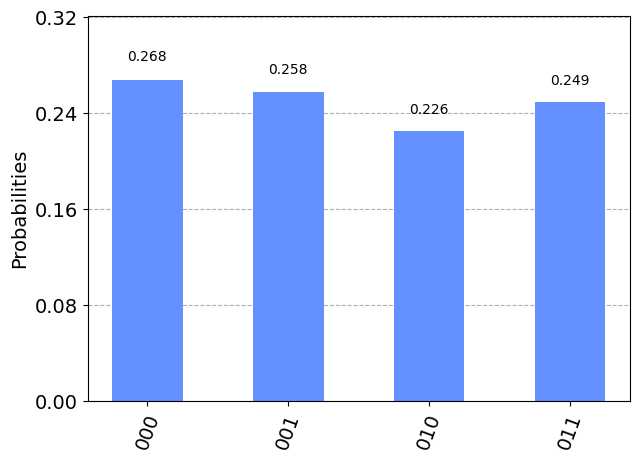

In [2]:
qc = QuantumCircuit(3)

# Stworzenie superpozycji wszystkich kombinacji bitów na kubitach 0 oraz 1
qc.h(0)
qc.h(1)

#---- Dodać bramki tutaj


#----

qc.measure_all()

simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts(qc))

### OR
Cel: uzyskać stan $\frac{1}{2}(\vert 000 \rangle + \vert 011 \rangle + \vert 101 \rangle + \vert 111 \rangle)$ (w notacji qiskit wyniki: $000$, $110$, $101$ oraz $111$).

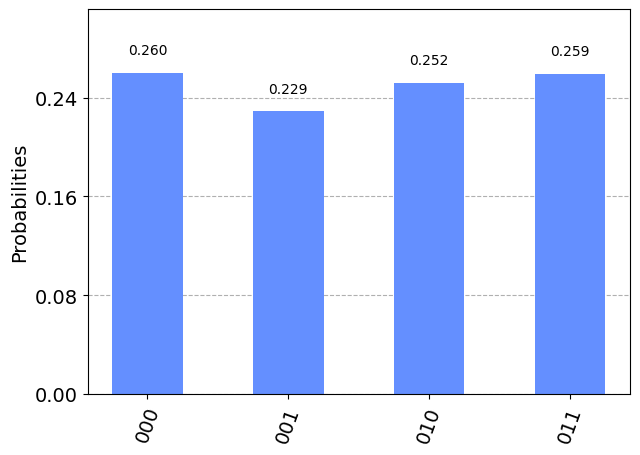

In [3]:
qc = QuantumCircuit(3)

# Stworzenie superpozycji wszystkich kombinacji bitów na kubitach 0 oraz 1
qc.h(0)
qc.h(1)

#---- Dodać bramki tutaj


#----

qc.measure_all()

simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts(qc))

### XOR
O kwantowym odpowiedniku bramki XOR można myśleć na dwa sposoby. Po pierwsze - tak jak powyżej, czyli dwa bity wejściowe i jeden wyjściowy. Ale często można się spotkać też z tym, że uznaje się bramkę CNOT za analogon klasycznego XOR, w tym sensie że na drugim bicie pojawia się wynik działania (`q_1 XOR q_2`).   


**Pytanie.** Dlaczego podobne podejście nie jest możliwe w przypadku bramek AND czy OR (nie da się "zapisać" wyniku na drugim kubicie, a potrzebny jest do tego dodatkowy kubit?

### NOT
Za analogię klasycznej bramki NOT często uznaje się bramkę kwantową X, z racji że zamienia kubit w stanie $\vert 0 \rangle$ na $\vert 1 \rangle$ i odwrotnie.  

### $\sqrt{NOT}$ (bramka *square root of NOT*)

**Zadanie.** Skonstruować obwód kwantowy, który po zadziałaniu na dowolny stan dwukrotnie da ten sam efekt, co zadziałanie bramką X (wykona klasyczną operację NOT). Można to zrobić na przykład przy pomocy kombinacji bramek $H$ oraz $S$. Wyświetlić macierzową reprezentację tego obwodu.   
  
Spróbować skonstruować inny taki obwód (*podpowiedź*: należy użyć tych samych bramek w innej kolejności). Czy macierz $\sqrt{NOT}$ jest określona jednoznacznie?

Co ciekawe - nie istnieje klasyczny odpowiednik takiej bramki. Nie ma klasycznej operacji, która po zadziałaniu dwukrotnie na bicie da efekt działania bramką NOT.

In [ ]:
def square_root_of_not(circuit):
    # tutaj należy uzupełnić odpowiednie bramki
    pass


qc = QuantumCircuit(1)

# działamy bramką dwukrotnie, aby sprawdzić efekt na wektorze początkowym 
square_root_of_not(qc)
square_root_of_not(qc)

qc.measure_all()

simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts(qc))

In [ ]:
# Teraz wyświetlmy reprezentację macierzową bramki sqrt(NOT)

qc = QuantumCircuit(1)

square_root_of_not(qc)

array_to_latex(Operator(qc))


### Odwracanie działania bramek

Ważną cechą bramek kwantowych jest ich odwracalność. Dopóki nie wykonamy pomiaru układu, możemy odwrócić każdą operację, którą na nim wykonaliśmy.  

**Zadanie.** Odwrócić układ, tj. uzyskać z powrotem stan $\vert 000 \rangle$, nie usuwając żadnej z obecnych już bramek (nie wolno zmieniać nic w obwodzie, co stoi przed "barrier").

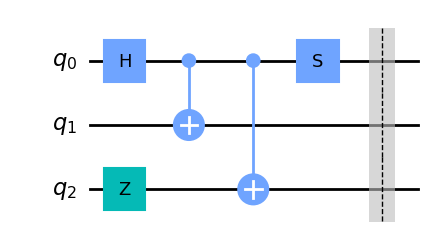

In [6]:
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.z(2)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.s(0)
circuit.barrier()

#-------
# tutaj należy umieścić bramki "odwracające" działanie pierwszej części obwodu

#------

circuit.draw(output="mpl")

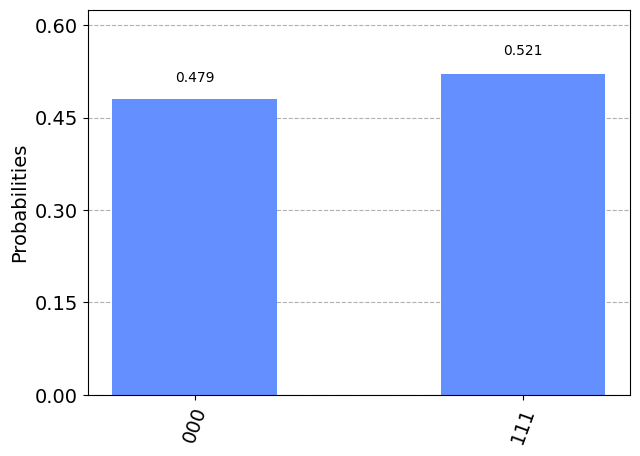

In [7]:
# Po poprawnym odwróceniu układu powinniśmy mierzyć jedynie wartość 000.

circuit.measure_all()

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))